In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

la_liga = pd.read_csv("../normalized_data/2000-2010.csv")




     
     
data= la_liga[['position', 'team', 'points', 'won', 'lost', 'drawn', 'played', 'goals_for', 'goal_difference']]
print(la_liga.head())


print(la_liga.shape)


print(la_liga.dtypes)


print(la_liga.isnull().sum())


print(la_liga.describe())


sns.histplot(la_liga['points'], kde=True)
plt.show()


sns.scatterplot(x='goals_for', y='points', data=la_liga)
plt.show()




KeyError: "['draw'] not in index"

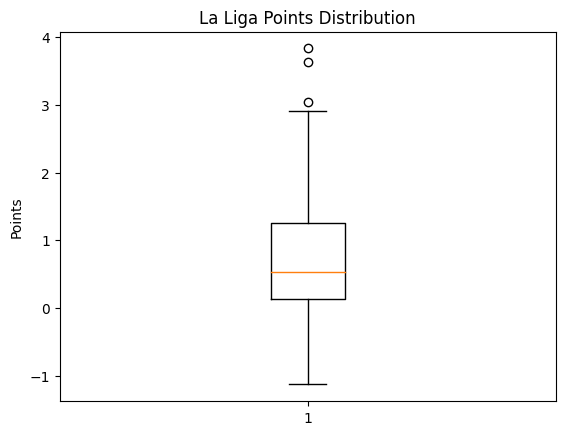

Outliers:
   position         team    points       won      lost      draw    played  \
0         1    Barcelona  3.039666  2.864498 -1.839031 -0.822549  0.777873   
0         1    Barcelona  3.834378  3.698903 -2.728409 -0.822549  0.777873   
1         2  Real Madrid  3.635700  3.698903 -2.061375 -1.735881  0.777873   

   goals_for  goals_against  goal_difference  year  
0   3.665030      -1.015040         0.210485  2008  
0   3.217151      -1.892938         0.230129  2009  
1   3.473082      -1.015040         0.201717  2009  


In [ ]:
plt.boxplot(la_liga['points'])


plt.title('La Liga Points Distribution')
plt.ylabel('Points')

plt.show()


q1 = la_liga['points'].quantile(0.25)
q3 = la_liga['points'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr
print("upper bound: ",upper_bound)
print("lower bound: ",lower_bound)

outliers = la_liga[(la_liga['points'] > upper_bound) | (la_liga['points'] < lower_bound)]
print('Outliers:')
print(outliers)

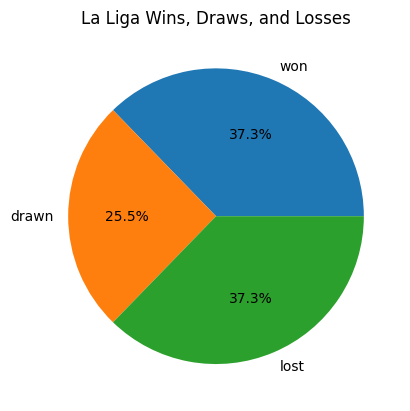

In [ ]:
arr=[]
year1=2000
year2=2001
while(year1!=2010):
    string=str(year1)+"-"+str(year2)[2:]
    final_string="./orig_data/laliga_points_table_"+string+".csv"
    arr.append(final_string)
    year1=year1+1
    year2=year2+1
data_frames = []
for file_name in arr:
    data = pd.read_csv(file_name)
    data_frames.append(data)
la_liga = pd.concat(data_frames)




     
data= la_liga[['position', 'team', 'played', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'points']]

wins = la_liga['won'].sum()
draws = la_liga['drawn'].sum()
losses = la_liga['lost'].sum()

values = [wins, draws, losses]
labels = ['won', 'drawn', 'lost']


plt.pie(values, labels=labels, autopct='%1.1f%%')


plt.title('La Liga Wins, Draws, and Losses')


plt.show()

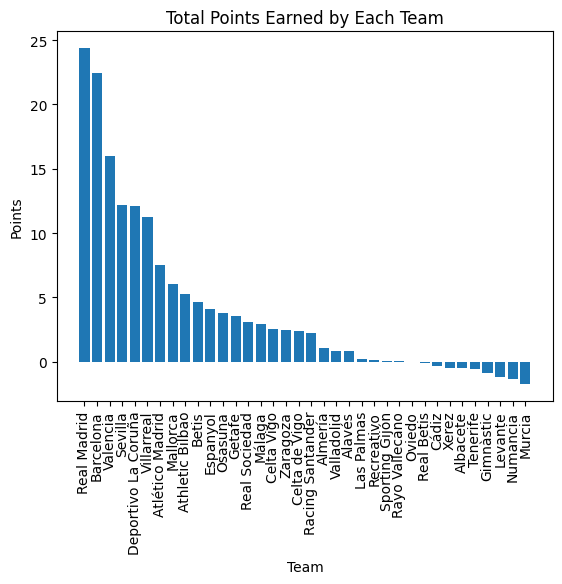

In [ ]:

df = pd.read_csv("../normalized_data/2000-2010.csv")

# Create a new dataframe that groups the data by team
team_df = df.groupby('team').sum()

# Sort the teams by total points
team_df = team_df.sort_values('points', ascending=False)

# Plot the bar chart of points earned
plt.bar(team_df.index, team_df['points'])
plt.xticks(rotation=90)
plt.title('Total Points Earned by Each Team')
plt.xlabel('Team')
plt.ylabel('Points')
plt.show()




  



Text(0, 0.5, 'points')

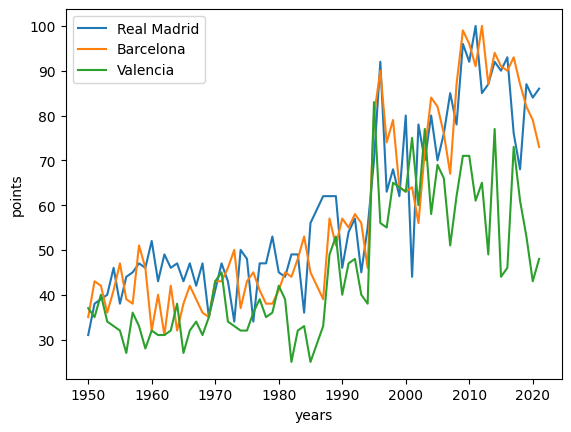

In [ ]:

string="../teams/Real Madrid.csv"
data=pd.read_csv(string)
data= data[['position', 'team', 'played', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'points',"year"]]


string="../teams/Barcelona.csv"
data2=pd.read_csv(string)
data2= data2[['position', 'team', 'played', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'points',"year"]]
string="../teams/Valencia.csv"
data3=pd.read_csv(string)
data3= data3[['position', 'team', 'played', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'points',"year"]]


year=[]
for i in data['year']:
    year.append(int(i[0:4]))



  
plt.plot(year, data["points"], label=data["team"][0])
plt.plot(year, data2["points"], label=data2["team"][0])
plt.plot(year, data3["points"], label=data3["team"][0])
plt.legend()

plt.xticks(range(min(year), max(year)+1, 10))
plt.xlabel("years")
plt.ylabel("points")